In [49]:
from random import *
from math import *
from copy import *
from IPython.display import Image

# Simple malleable scheduler 

Objective: Min makespan 

Constraints:
- two jobs cannot be scheduled on the processor at the same time
- A jobs can be reconfigured
- quantum of time / time slot
- number of processors at each time slot is fixed

### 1. Algorithm: Greedy largest task first

Assumptions:
- No reconfiguration time
- amount of resources required = number of processors x time
- max amount of time required to 


Algorithm:
- order the jobs from the largest to smallest in terms of resources
- for all task t in tasks (starting with largest)
- if t is smaller than first available timeslot:
    add time slot number : t to task dict, subtract t to res of first time slot <br>
  else if t is equal to the first available timeslot: add time slot number : t to task dict, remove time slot from list of available resources <br>
  else if t is larger than he first available timeslot:<br>
  add time slot number : res available at first time slot<br>
  remove timeslot<br>
  t_ = t - res available at first time slot <br>
  while (t_>0):<br>
  if t_ is smaller than first available timeslot:
    add time slot number : t_ to task dict, subtract t_ to res of time slot, t_ = 0 <br>
  else if t is equal to the first available timeslot: add time slot number : t_ to task dict, t_ = 0 , remove time slot from list of available resources <br>
  else if t is largest to the first available timeslot: add time slot number : t_ to task dict, subtract  res of time slot to t_, t_ = 0 , remove time slot from list of available resources <br>


In python:
Input: 
- Task: $q$ total amount of resources required = number of processors x time, Dictionary : 
- available processors at each time slots: array 

Output:
 [amount of resources, start time , end time, for each t the number of resources]




Initializing the resources available for computation

In [1]:
# max number of processors available at each time slot
max_num_proc = 5

# res_av resources available at each timeslot
#dictionary key:time slot and value:amount of resources available on that time slot
res_av = [{'timeslot':i,'res' : max_num_proc} for i in range(1,20)]
res_av

[{'timeslot': 1, 'res': 5},
 {'timeslot': 2, 'res': 5},
 {'timeslot': 3, 'res': 5},
 {'timeslot': 4, 'res': 5},
 {'timeslot': 5, 'res': 5},
 {'timeslot': 6, 'res': 5},
 {'timeslot': 7, 'res': 5},
 {'timeslot': 8, 'res': 5},
 {'timeslot': 9, 'res': 5},
 {'timeslot': 10, 'res': 5},
 {'timeslot': 11, 'res': 5},
 {'timeslot': 12, 'res': 5},
 {'timeslot': 13, 'res': 5},
 {'timeslot': 14, 'res': 5},
 {'timeslot': 15, 'res': 5},
 {'timeslot': 16, 'res': 5},
 {'timeslot': 17, 'res': 5},
 {'timeslot': 18, 'res': 5},
 {'timeslot': 19, 'res': 5}]

Preparing the input

In [51]:
# Defining 2 jobs, one requiring 7 resource blocks and another requiring 2 blocks
job1 = {'name': 'task1', 'res_req':27}
job2 = {'name': 'task2','res_req':5}
job3 = {'name': 'task3', 'res_req':13}
job4 = {'name': 'task4', 'res_req':15}
# putting all the jobs into one array
jobs = [job2, job1, job3, job4]

# Sorting jobs from lowest res_req value to largest 
jobs = sorted(jobs, key=lambda k: k['res_req']) 

# reverse list order so that the jobs are ordered in decreasing res_req order
jobs.reverse()

In [52]:
jobs

[{'name': 'task1', 'res_req': 27},
 {'name': 'task4', 'res_req': 15},
 {'name': 'task3', 'res_req': 13},
 {'name': 'task2', 'res_req': 5}]

In [53]:
def greedy_sched(jobs, res_av):
    res_av_left = deepcopy(res_av)
    jobs_ = deepcopy(jobs)
    for job in jobs_:
        t = job['res_req']

        if t < res_av_left[0]['res']:
            job[res_av_left[0]['timeslot']] = t
            res_av_left[0]['res'] = res_av_left[0]['res'] - t

        elif t == res_av_left[0]['res']:
            job[res_av_left[0]['timeslot']] = t
            del res_av_left[0]

        else:
            job[res_av_left[0]['timeslot']] = res_av_left[0]['res']

            t_ = t - res_av_left[0]['res']
            del res_av_left[0]
            while (t_>0):        
                if t_ < res_av_left[0]['res']:
                    job[res_av_left[0]['timeslot']] = t_
                    res_av_left[0]['res'] = res_av_left[0]['res'] - t_
                    t_ = 0
                elif t_ == res_av_left[0]['res']:
                    job[res_av_left[0]['timeslot']] = res_av_left[0]['res']
                    del res_av_left[0]
                    t_ = 0
                else:
                    job[res_av_left[0]['timeslot']] = res_av_left[0]['res']
                    t_ = t_ - res_av_left[0]['res']
                    del res_av_left[0]

    if res_av_left[0]['res'] != max_num_proc:
        make_span = res_av_left[0]['timeslot'] 
    else:
        make_span = res_av_left[0]['timeslot'] - 1
    
    return jobs_, res_av_left, make_span

In [54]:
sched_jobs, res_av_left, make_span = greedy_sched(jobs, res_av)

In [55]:
jobs


[{'name': 'task1', 'res_req': 27},
 {'name': 'task4', 'res_req': 15},
 {'name': 'task3', 'res_req': 13},
 {'name': 'task2', 'res_req': 5}]

In [56]:
sched_jobs

[{'name': 'task1', 'res_req': 27, 1: 5, 2: 5, 3: 5, 4: 5, 5: 5, 6: 2},
 {'name': 'task4', 'res_req': 15, 6: 3, 7: 5, 8: 5, 9: 2},
 {'name': 'task3', 'res_req': 13, 9: 3, 10: 5, 11: 5},
 {'name': 'task2', 'res_req': 5, 12: 5}]

In [57]:
res_av_left

[{'timeslot': 13, 'res': 5},
 {'timeslot': 14, 'res': 5},
 {'timeslot': 15, 'res': 5},
 {'timeslot': 16, 'res': 5},
 {'timeslot': 17, 'res': 5},
 {'timeslot': 18, 'res': 5},
 {'timeslot': 19, 'res': 5}]

In [58]:
make_span

12

In [60]:
#Function to draw gant chart from output data
import cairocffi as cairo
def gant_chart(jobs, make_span, max_num_proc, filename, isDrawGrid = False):
    WIDTH, HEIGHT = 800, 400
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, WIDTH, HEIGHT)
    ctx = cairo.Context(surface)

    ctx.scale(WIDTH, HEIGHT)  # Normalizing the canvas

    ctx.rectangle(0, 0, 1, 1)  # Rectangle(x0, y0, width, height)
    ctx.set_source_rgb(1, 1, 1)
    ctx.fill()



    jobs_colors = [[ random() for j in range(3)] for i in range (len(jobs))]

    res_used = [0 for i in range(0 , make_span)]
    x_offset = 0.1
    y_offset = 0.1
    rect_width = (1 - x_offset * 2) / make_span
    rect_height = (1 - y_offset * 2) / max_num_proc

    for i in range(make_span):
        for j in range(len(jobs)):
            if i + 1 in jobs[j]:

                ctx.rectangle(x_offset + i * rect_width, 1 - (y_offset + (res_used[i] + jobs[j][i+1] ) * rect_height),
                               rect_width,  jobs[j][i+1] * rect_height)
                res_used[i] = res_used[i] + jobs[j][i+1]
                ctx.set_source_rgb(jobs_colors[j][0], jobs_colors[j][1], jobs_colors[j][2])
                ctx.fill()
    
    if (isDrawGrid):
        for i in range(make_span + 1):

                ctx.move_to(x_offset + i * rect_width, y_offset)
                ctx.line_to(x_offset + i * rect_width, 1 - y_offset)
                ctx.set_source_rgba(0, 0, 0, 0.9)  
                ctx.set_line_width(0.001)
                ctx.stroke()

        for j in range(max_num_proc + 1):
            ctx.move_to(x_offset , y_offset + j * rect_height)
            ctx.line_to(1 - x_offset, y_offset + j * rect_height)
            ctx.set_source_rgba(0, 0, 0, 0.9)  
            ctx.set_line_width(0.001)
            ctx.stroke()

    surface.write_to_png(filename)  # Output to PNG

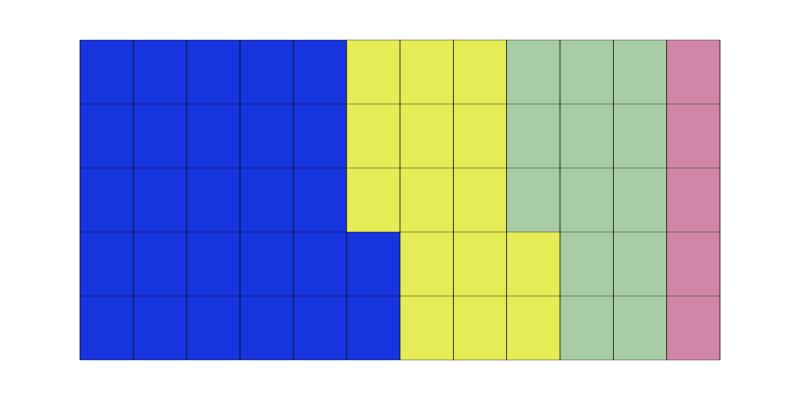

In [61]:
file_name = "simplegreedy1.png"
gant_chart(sched_jobs, make_span, max_num_proc, file_name, True)
Image(filename = file_name, width=400, height=200)

In [62]:
sched_jobs

[{'name': 'task1', 'res_req': 27, 1: 5, 2: 5, 3: 5, 4: 5, 5: 5, 6: 2},
 {'name': 'task4', 'res_req': 15, 6: 3, 7: 5, 8: 5, 9: 2},
 {'name': 'task3', 'res_req': 13, 9: 3, 10: 5, 11: 5},
 {'name': 'task2', 'res_req': 5, 12: 5}]

#### an example with a much larger number of jobs

In [63]:
# max number of processors available at each time slot
max_num_proc = 5

estimated_max_makespan = 10000
# res_av resources available at each timeslot
#dictionary key:time slot and value:amount of resources available on that time slot
res_av = [{'timeslot':i,'res' : max_num_proc} for i in range(1,estimated_max_makespan)]

seed(4)
# putting all the jobs into one array
jobs = [{'name' : 'task'+str(i), 'res_req' : randint(2, 40)} for i in range(20)]

# Sorting jobs from lowest res_req value to largest 
jobs = sorted(jobs, key=lambda k: k['res_req']) 

# reverse list order so that the jobs are ordered in decreasing res_req order
jobs.reverse()

In [64]:
make_span

12

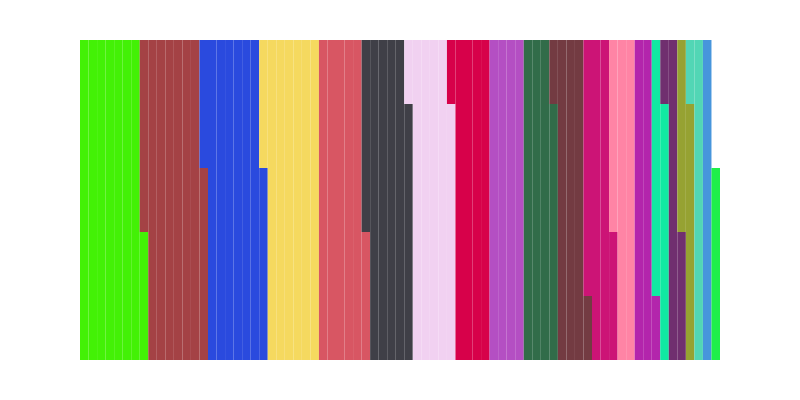

In [65]:
sched_jobs, res_av_left, make_span = greedy_sched(jobs, res_av)
file_name = "simplegreedy1large.png"
gant_chart(sched_jobs, make_span, max_num_proc, file_name)
Image(filename = file_name, width=800, height=200)

### 2. Adding min and max number processors needed for a job

change the algorithm from starting with the largest res_req to starting with the job with the largest maximum number of processors max_proc and largest min_req

In [100]:
# Defining 2 jobs, one requiring 7 resource blocks and another requiring 2 blocks
job1 = {'name': 'task1', 'res_req':2, 'min_proc': 2, 'max_proc': 5}
job2 = {'name': 'task2','res_req':27, 'min_proc': 3, 'max_proc': 5}
job3 = {'name': 'task3', 'res_req':14, 'min_proc': 2, 'max_proc': 3}
job4 = {'name': 'task4', 'res_req':5, 'min_proc': 3, 'max_proc': 3}
job5 = {'name': 'task5', 'res_req':6, 'min_proc': 1, 'max_proc': 2}
job6 = {'name': 'task6', 'res_req':1, 'min_proc': 1, 'max_proc': 1}
# putting all the jobs into one array
jobs = [job2, job1, job3, job4, job5, job6]

# Sorting jobs from lowest res_req value to largest 
jobs = sorted(jobs, key=lambda k: (k['max_proc'], k['min_proc'])) 

# reverse list order so that the jobs are ordered in decreasing res_req order
jobs.reverse()

In [101]:
jobs

[{'name': 'task2', 'res_req': 27, 'min_proc': 3, 'max_proc': 5},
 {'name': 'task1', 'res_req': 2, 'min_proc': 2, 'max_proc': 5},
 {'name': 'task4', 'res_req': 5, 'min_proc': 3, 'max_proc': 3},
 {'name': 'task3', 'res_req': 14, 'min_proc': 2, 'max_proc': 3},
 {'name': 'task5', 'res_req': 6, 'min_proc': 1, 'max_proc': 2},
 {'name': 'task6', 'res_req': 1, 'min_proc': 1, 'max_proc': 1}]

In [102]:
# max number of processors available at each time slot
max_num_proc = 5
estimated_max_makespan = 100
# res_av resources available at each timeslot
#dictionary key:time slot and value:amount of resources available on that time slot
res_av = [{'timeslot':i,'res' : max_num_proc} for i in range(1,estimated_max_makespan)]

In [103]:
def max_sub(proc_avail, max_in, min_in):
    if proc_avail >= max_in:
        proc = max_in
    else:
        proc = proc_avail
    
    return proc

In [104]:
def greedy_sched_minmaxproc(jobs, res_av):
    res_av_left = deepcopy(res_av)
    jobs_ = deepcopy(jobs)
    
    for job in jobs_:
        start_timeslot = 0
        #1) Find possible starting timeslot
        
              
        t = job['res_req']
        
        
        while (t>0):
        # Find first time slot with available min_proc available 
            #check if timeslot is sufficiently large 
            
            if res_av_left[start_timeslot]['res']<job['min_proc']:
                start_timeslot = start_timeslot + 1
                continue
                
            t = job['res_req']
            
            #check successor of the current candidate starting timeslot
            for j in range(start_timeslot,len(res_av_left)):
                # check if the timeslot is a successor of the previous timeslot selected, if not break for loop
                if j!=start_timeslot and res_av_left[j]['timeslot'] != res_av_left[j-1]['timeslot'] +1:
                    start_timeslot = j
                    break
                #check if timeslot has the min number of proc
                if res_av_left[j]['res']<job['min_proc']:
                    start_timeslot = j + 1
                    break
                
                #if suitable then subtract the time
                t = t - max_sub(res_av_left[j]['res'], job['max_proc'], job['min_proc'])
                if t <=0:
                    break

        
        t = job['res_req']
        num_proc_used = max_sub(res_av_left[start_timeslot]['res'], job['max_proc'], job['min_proc'])
        # Check if the job can be fitted into one timeslot
        if t < num_proc_used :
            job[res_av_left[start_timeslot]['timeslot']] = t
            res_av_left[start_timeslot]['res'] = res_av_left[start_timeslot]['res'] - t
            if res_av_left[start_timeslot]['res'] == 0:
                del res_av_left[start_timeslot]
        elif t == num_proc_used :
            job[res_av_left[start_timeslot]['timeslot']] = t
            res_av_left[start_timeslot]['res'] = res_av_left[start_timeslot]['res'] - t
            if res_av_left[start_timeslot]['res'] == 0:
                del res_av_left[start_timeslot]
        
        else:
            job[res_av_left[start_timeslot]['timeslot']] = num_proc_used 

            t_ = t - num_proc_used 
            res_av_left[start_timeslot]['res'] = res_av_left[start_timeslot]['res'] - max_sub(res_av_left[start_timeslot]['res'], job['max_proc'], job['min_proc'])
            if res_av_left[start_timeslot]['res'] == 0:
                del res_av_left[start_timeslot]
            else:
                start_timeslot = start_timeslot + 1
            while (t_>0):        
                if t_ < max_sub(res_av_left[start_timeslot]['res'], job['max_proc'], job['min_proc']):
                    job[res_av_left[start_timeslot]['timeslot']] = t_
                    res_av_left[start_timeslot]['res'] = res_av_left[start_timeslot]['res'] - t_
                    t_ = 0

                else:
                    job[res_av_left[start_timeslot]['timeslot']] = max_sub(res_av_left[start_timeslot]['res'], job['max_proc'], job['min_proc'])
                    t_ = t_ - max_sub(res_av_left[start_timeslot]['res'], job['max_proc'], job['min_proc'])
                    res_av_left[start_timeslot]['res'] = res_av_left[start_timeslot]['res'] - max_sub(res_av_left[start_timeslot]['res'], job['max_proc'], job['min_proc'])
                    if res_av_left[start_timeslot]['res'] == 0:
                        del res_av_left[start_timeslot]
                    else:
                        start_timeslot = start_timeslot + 1


    for r in res_av_left:
        if r['res'] == 5:
            make_span = r['timeslot'] - 1
            break
    
    return jobs_, res_av_left, make_span

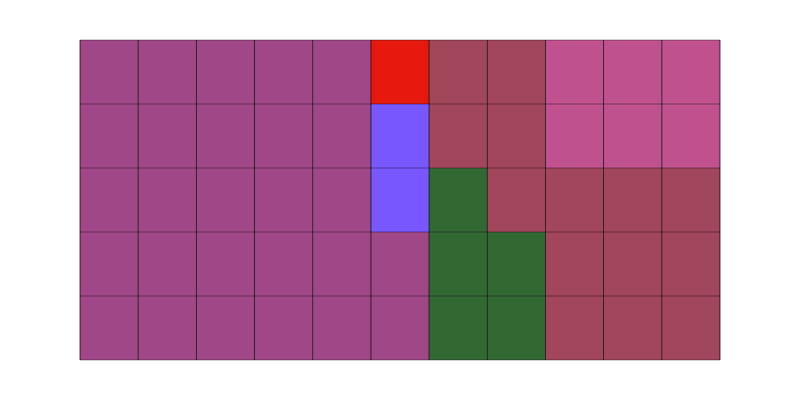

In [105]:
sched_jobs, res_av_left, make_span = greedy_sched_minmaxproc(jobs, res_av)

file_name = "greedy_sched_minmaxproc.png"
gant_chart(sched_jobs, make_span, max_num_proc, file_name, True)
Image(filename = file_name, width=800, height=200)

In [106]:
make_span

11

In [107]:
jobs

[{'name': 'task2', 'res_req': 27, 'min_proc': 3, 'max_proc': 5},
 {'name': 'task1', 'res_req': 2, 'min_proc': 2, 'max_proc': 5},
 {'name': 'task4', 'res_req': 5, 'min_proc': 3, 'max_proc': 3},
 {'name': 'task3', 'res_req': 14, 'min_proc': 2, 'max_proc': 3},
 {'name': 'task5', 'res_req': 6, 'min_proc': 1, 'max_proc': 2},
 {'name': 'task6', 'res_req': 1, 'min_proc': 1, 'max_proc': 1}]

In [108]:
sched_jobs

[{'name': 'task2',
  'res_req': 27,
  'min_proc': 3,
  'max_proc': 5,
  1: 5,
  2: 5,
  3: 5,
  4: 5,
  5: 5,
  6: 2},
 {'name': 'task1', 'res_req': 2, 'min_proc': 2, 'max_proc': 5, 6: 2},
 {'name': 'task4', 'res_req': 5, 'min_proc': 3, 'max_proc': 3, 7: 3, 8: 2},
 {'name': 'task3',
  'res_req': 14,
  'min_proc': 2,
  'max_proc': 3,
  7: 2,
  8: 3,
  9: 3,
  10: 3,
  11: 3},
 {'name': 'task5',
  'res_req': 6,
  'min_proc': 1,
  'max_proc': 2,
  9: 2,
  10: 2,
  11: 2},
 {'name': 'task6', 'res_req': 1, 'min_proc': 1, 'max_proc': 1, 6: 1}]

In [109]:
# max number of processors available at each time slot
max_num_proc = 5

estimated_max_makespan = 10000
# res_av resources available at each timeslot
#dictionary key:time slot and value:amount of resources available on that time slot
res_av = [{'timeslot':i,'res' : max_num_proc} for i in range(1,estimated_max_makespan)]

seed(4)
# putting all the jobs into one array
jobs = []
for i in range(20):
    r = randint(1,20)
    mini = randint(1,5)
    maxi = randint(mini,5)
    job = {'name': 'task'+str(i), 'res_req':r, 'min_proc': mini, 'max_proc': maxi}
    jobs.append(job)

# Sorting jobs from lowest max_proc value to largest and then min proc
jobs = sorted(jobs, key=lambda k: (k['max_proc'], k['min_proc'])) 

# reverse list order so that the jobs are ordered in decreasing res_req order
jobs.reverse()



In [110]:
jobs

[{'name': 'task3', 'res_req': 13, 'min_proc': 5, 'max_proc': 5},
 {'name': 'task15', 'res_req': 7, 'min_proc': 4, 'max_proc': 5},
 {'name': 'task14', 'res_req': 19, 'min_proc': 3, 'max_proc': 5},
 {'name': 'task11', 'res_req': 6, 'min_proc': 2, 'max_proc': 5},
 {'name': 'task12', 'res_req': 9, 'min_proc': 1, 'max_proc': 5},
 {'name': 'task9', 'res_req': 12, 'min_proc': 1, 'max_proc': 5},
 {'name': 'task10', 'res_req': 11, 'min_proc': 4, 'max_proc': 4},
 {'name': 'task1', 'res_req': 13, 'min_proc': 4, 'max_proc': 4},
 {'name': 'task16', 'res_req': 20, 'min_proc': 3, 'max_proc': 4},
 {'name': 'task8', 'res_req': 6, 'min_proc': 3, 'max_proc': 4},
 {'name': 'task4', 'res_req': 2, 'min_proc': 2, 'max_proc': 4},
 {'name': 'task19', 'res_req': 3, 'min_proc': 1, 'max_proc': 4},
 {'name': 'task18', 'res_req': 10, 'min_proc': 3, 'max_proc': 3},
 {'name': 'task7', 'res_req': 9, 'min_proc': 3, 'max_proc': 3},
 {'name': 'task0', 'res_req': 8, 'min_proc': 3, 'max_proc': 3},
 {'name': 'task17', 'res_

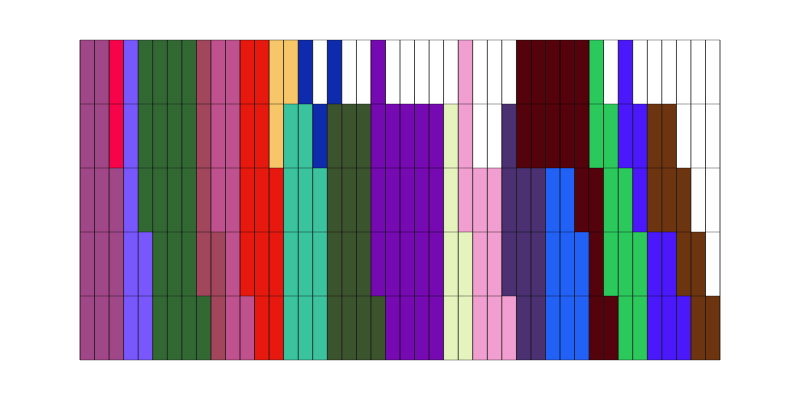

In [111]:
sched_jobs, res_av_left, make_span = greedy_sched_minmaxproc(jobs, res_av)

file_name = "greedy_sched_minmaxproc.png"
gant_chart(sched_jobs, make_span, max_num_proc, file_name, True)
Image(filename = file_name, width=800, height=200)

### 3. Add reconfiguration time
if $n\geq m$:<br>
$T_{n\rightarrow m} = \frac{D}{n}(\lceil \frac{n}{m}\rceil - 1)$<br>
if $n\leq m$:<br>
$T_{n\rightarrow m} = \frac{D}{m}(\lceil \frac{m}{n}\rceil - 1)$<br>

where $D$ is the data amount in the application, $n$ number of nodes in the previous process and $m$ the number of nodes in the new process

In [112]:
def reconfig_time(init_nodes, final_nodes, data_amount):
    if final_nodes == 0:
        return 0
    if init_nodes > final_nodes:
        return data_amount / init_nodes * (ceil(init_nodes / final_nodes)-1)
    return data_amount / final_nodes * (ceil(final_nodes / init_nodes)-1)

In [113]:
reconfig_time(5,1,100)

80.0

In [114]:
#TODO modify alg
